In [14]:
latex_dir = 'LaTex/img/'
EXPORT_FOR_LATEX = True

def plot_images(plot, figname=None):
    if EXPORT_FOR_LATEX:
        plt.savefig(latex_dir+figname+'.pdf', bbox_inches='tight')
    else:
        plot.show()

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pymc3

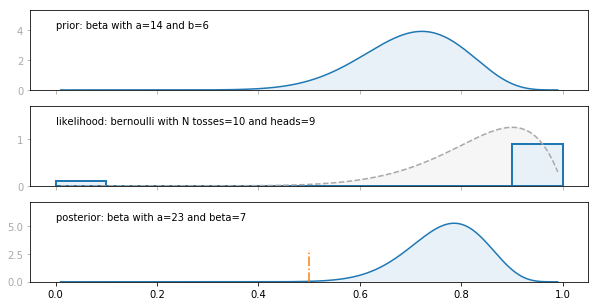

In [16]:
f, axes = plt.subplots(3,1, sharex='col', sharey='row', figsize=(10,5))
dist_in = np.arange(.01,.99,.0001)

def binomial_p(thetas, N, head):
    return np.power(thetas,head)*np.power(1-thetas,N-head)

a,b= 14,6
N , h= 10,9

beta_prior = stats.beta(a,b)
dist_out = beta_prior.pdf(dist_in)
axes[0].plot(dist_in,dist_out)
axes[0].fill_between(dist_in,dist_out, alpha =.1)
axes[0].tick_params(axis='both', colors='darkgrey')
axes[0].text(0,axes[0].get_ylim()[1]*1,'prior: beta with a='+str(a)+' and b='+str(b))
axes[0].set_ylim([0,axes[0].get_ylim()[1]*1.3])


likelihood = stats.bernoulli(h/N)
dist_out = likelihood.rvs(len(dist_in))
weights = np.ones_like(dist_out)/float(len(dist_out))
axes[1].hist(dist_out, color='#e8f1f7', edgecolor = '#1f77b4',linewidth=2, align='mid', weights=weights)
axes[1].tick_params(axis='both', colors='darkgrey')

bin_p = binomial_p(dist_in,N,h)
z=bin_p.sum()/dist_out.sum()
bin_p_norm = bin_p/z/3
axes[1].plot(dist_in,bin_p_norm,'--', color='darkgrey')
axes[1].fill_between(dist_in,bin_p_norm, alpha =.1, color='darkgrey')
axes[1].text(0,axes[1].get_ylim()[1],'likelihood: bernoulli with N tosses='+str(N)+' and heads='+str(h))
axes[1].set_ylim([0,axes[1].get_ylim()[1]*1.3])

beta_posterior = stats.beta(a+h,b+N-h)
dist_out = beta_posterior.pdf(dist_in)

axes[2].plot(dist_in,dist_out)
axes[2].fill_between(dist_in,dist_out, alpha =.1)
axes[2].tick_params(axis='y', colors='darkgrey')
axes[2].text(0,axes[2].get_ylim()[1],'posterior: beta with a='+str(a+h)+' and beta='+str(b+N-h))
axes[2].set_ylim([0,axes[2].get_ylim()[1]*1.3])
axes[2].plot([.5,.5],[0,axes[2].get_ylim()[1]*.4],"-.")

plot_images(plt, '2_1')

# jeffrey's prior

In [17]:
f, axes = plt.subplots(3,1, sharex='col', sharey='row', figsize=(10,5))
dist_in = np.arange(.01,.99,.0001)

def binomial_p(thetas, N, head):
    return np.power(thetas,head)*np.power(1-thetas,N-head)

a,b= .5,.5
N , h= 10,9

beta_prior = stats.beta(a,b)
dist_out = beta_prior.pdf(dist_in)
axes[0].plot(dist_in,dist_out)
axes[0].fill_between(dist_in,dist_out, alpha =.1)
axes[0].tick_params(axis='both', colors='darkgrey')
axes[0].text(0,axes[0].get_ylim()[1]*1,'prior: beta with a='+str(a)+' and b='+str(b))
axes[0].set_ylim([0,axes[0].get_ylim()[1]*1.3])


likelihood = stats.bernoulli(h/N)
dist_out = likelihood.rvs(len(dist_in))
weights = np.ones_like(dist_out)/float(len(dist_out))
axes[1].hist(dist_out, color='#e8f1f7', edgecolor = '#1f77b4',linewidth=2, align='mid', weights=weights)
axes[1].tick_params(axis='both', colors='darkgrey')

bin_p = binomial_p(dist_in,N,h)
z=bin_p.sum()/dist_out.sum()
bin_p_norm = bin_p/z/3
axes[1].plot(dist_in,bin_p_norm,'--', color='darkgrey')
axes[1].fill_between(dist_in,bin_p_norm, alpha =.1, color='darkgrey')
axes[1].text(0,axes[1].get_ylim()[1],'likelihood: bernoulli with N tosses='+str(N)+' and heads='+str(h))
axes[1].set_ylim([0,axes[1].get_ylim()[1]*1.3])

beta_posterior = stats.beta(a+h,b+N-h)
dist_out = beta_posterior.pdf(dist_in)

axes[2].plot(dist_in,dist_out)
axes[2].fill_between(dist_in,dist_out, alpha =.1)
axes[2].tick_params(axis='y', colors='darkgrey')
axes[2].text(0,axes[2].get_ylim()[1],'posterior: beta with a='+str(a+h)+' and beta='+str(b+N-h))
axes[2].set_ylim([0,axes[2].get_ylim()[1]*1.3])
axes[2].plot([.5,.5],[0,axes[2].get_ylim()[1]*.4],"-.")

plot_images(plt, '2_2')

In [20]:
import math

def nCr(n,r):
    f = math.factorial
    ln = math.log
    return math.exp(ln(f(n))-ln( f(r)) - ln(f(n-r)))
    return f(n) /( f(r) * f(n-r))

def bernoulli(head,N,theta):
    return nCr(N,head)*np.power(theta,head)*np.power(1-theta,N-head)

def cdf_from_to(start, end, theta, N):
    cdf = []
    for i in range(start,end+1):
        cdf.append(bernoulli(i,N,theta))
    return cdf

In [26]:
print(bernoulli(9,10,0.5))

0.009765625


In [27]:
cdf = np.array(cdf_from_to(9,10,.5,10)).sum()
print(cdf)

0.0107421875


In [32]:
cdf = np.array(cdf_from_to(537,1000,.5,1000)).sum()
print(cdf)

0.010463555303


In [35]:
def binomial_p(thetas, N, head):
    return np.power(thetas,head)*np.power(1-thetas,N-head)

def show_dists(col,a,b,N,h):
    dist_in = np.arange(.01,.99,.0001)
    
    beta_prior = stats.beta(a,b)
    dist_out = beta_prior.pdf(dist_in)
    axes[0,col].plot(dist_in,dist_out)
    axes[0,col].fill_between(dist_in,dist_out, alpha =.1)
    axes[0,col].tick_params(axis='both', colors='darkgrey')
    axes[0,col].text(0,axes[0,col].get_ylim()[1]*1.1,'prior: beta with a='+str(a)+' and b='+str(b))
    axes[0,col].set_ylim([0,axes[0,col].get_ylim()[1]*1.3])

    likelihood = stats.bernoulli(h/N)
    dist_out = likelihood.rvs(len(dist_in))
    weights = np.ones_like(dist_out)/float(len(dist_out))
    axes[1,col].hist(dist_out, color='#e8f1f7', edgecolor = '#1f77b4',linewidth=2, align='mid', weights=weights)
    axes[1,col].tick_params(axis='both', colors='darkgrey')

    bin_p = binomial_p(dist_in,N,h)
    z=bin_p.sum()/dist_out.sum()
    bin_p_norm = bin_p/z/3
    axes[1,col].plot(dist_in,bin_p_norm,'--', color='darkgrey')
    axes[1,col].fill_between(dist_in,bin_p_norm, alpha =.1, color='darkgrey')
    axes[1,col].text(0,axes[1,col].get_ylim()[1]*1.1,'likelihood: bernoulli with N='+str(N)+' and heads='+str(h))
    axes[1,col].set_ylim([0,axes[1,col].get_ylim()[1]*1.3])

    beta_posterior = stats.beta(a+h,b+N-h)
    dist_out = beta_posterior.pdf(dist_in)

    axes[2,col].plot(dist_in,dist_out)
    axes[2,col].fill_between(dist_in,dist_out, alpha =.1)
    axes[2,col].tick_params(axis='y', colors='darkgrey')
    axes[2,col].text(0,axes[2,col].get_ylim()[1]*1.1,'posterior: beta with a='+str(a+h)+' and beta='+str(b+N-h))
    axes[2,col].set_ylim([0,axes[2,col].get_ylim()[1]*1.3])
    
    axes[2,col].plot([.5,.5],[0,axes[2,col].get_ylim()[1]*.4],"-.", color='#FF703E')
    axes[2,col].text(.46,axes[2,col].get_ylim()[1]*.3,'fair', color='#FF703E',rotation=90)
    HPD = pymc3.stats.hpd(beta_posterior.rvs(10000), alpha=.05)
    axes[2,col].fill_between(HPD,[axes[2,col].get_ylim()[1],axes[2,col].get_ylim()[1]], color='#008DE8',alpha=.2)
    axes[2,col].text(HPD[0]-.04,axes[2,col].get_ylim()[1]*.6,np.round(HPD[0],3), color='#008DE8',rotation=90)
    axes[2,col].text(HPD[1]+.01,axes[2,col].get_ylim()[1]*.6,np.round(HPD[1],3), color='#008DE8',rotation=90)
    
    return beta_posterior


In [51]:
f, axes = plt.subplots(3,3, sharex='col', figsize=(13,4))
dist_in = np.arange(.01,.99,.0001)

def binomial_p(thetas, N, head):
    return np.power(thetas,head)*np.power(1-thetas,N-head)

show_dists(0,5,5,10,8)
show_dists(1,5,5,100,80)
show_dists(2,5,5,1000,800)
plt.tight_layout()
plot_images(plt, '2_3')

In [71]:
from statsmodels.stats.proportion import proportion_confint
methods = ['normal','agresti_coull','jeffreys']

for m in methods:
    print('for',m,':')
    print(proportion_confint(8, 10, alpha=0.05, method=m))
    print(proportion_confint(80, 100, alpha=0.05, method=m))
    print(proportion_confint(800, 1000, alpha=0.05, method=m))

for normal :
(0.55208198707817535, 1.0479180129218246)
(0.72160144061839782, 0.87839855938160227)
(0.77520819870781754, 0.82479180129218255)
for agresti_coull :
(0.47936759056615064, 0.95411272951611592)
(0.71041158966677931, 0.86739231140902917)
(0.77405454822039932, 0.82364939668826742)
for jeffreys :
(0.497225503560007, 0.95594058644736923)
(0.71372042717268258, 0.86920958458131514)
(0.77436232845123565, 0.82390407512255504)


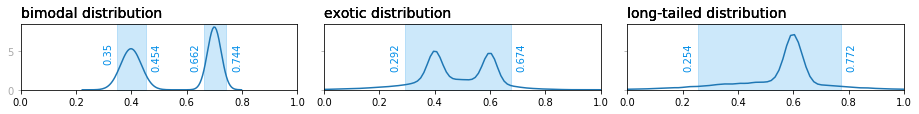

In [48]:
from scipy.stats.distributions import norm, bernoulli
f, axes = plt.subplots(1,3,sharey='row',figsize=(13,1.5))

def show_mixture(mixture, col, alpha=.05):
    dplot = sns.distplot(mixture, ax = axes[col], hist=False)
    def find_hpds(dplot, alpha=alpha):
        fit_dist = dplot.get_lines()[0].get_data()
        norm_dist = (fit_dist[1]/fit_dist[1].sum())
        sort_dist = norm_dist[np.argsort(norm_dist)[::-1]]
        min_p = sort_dist[np.argmax(sort_dist.cumsum()>1-alpha)]
        bigger_than_p = np.where(norm_dist > min_p)
        diff = np.ediff1d(bigger_than_p)
        breaks = np.where(diff>np.round(diff.min(),2))[0]
        np.split(fit_dist[0][bigger_than_p],breaks+1)
        return [[a[1],a[-1]] for a in np.split(fit_dist[0][bigger_than_p],breaks+1)]
    
    labels = ['bimodal distribution','exotic distribution','long-tailed distribution']
    for HPD in find_hpds(dplot):
        axes[col].fill_between(HPD,[axes[col].get_ylim()[1],axes[col].get_ylim()[1]], color='#008DE8',alpha=.2)
        axes[col].text(HPD[0]-.05,axes[col].get_ylim()[1]*.6,np.round(HPD[0],3), color='#008DE8',rotation=90)
        axes[col].text(HPD[1]+.02,axes[col].get_ylim()[1]*.6,np.round(HPD[1],3), color='#008DE8',rotation=90)
    
    for i,lab in enumerate(labels):
        axes[i].text(0,axes[col].get_ylim()[1]*1.1,lab, size=14)
        
    axes[col].set_xlim([0,1])
    axes[col].tick_params(axis='y', colors='darkgrey')

mix_size = 8000
alpha = .1

mix_1 = norm.rvs(.4,.03,mix_size)
mix_2 = norm.rvs(.7,.008,mix_size)
show_mixture(np.concatenate([mix_1,mix_2]), 0, alpha)

mix_1 = norm.rvs(.5,.12,mix_size)
mix_2 = norm.rvs(.4,.18,mix_size)
mix_3 = norm.rvs(.4,.018,mix_size)
mix_4 = norm.rvs(.6,.018,mix_size)
show_mixture(np.concatenate([mix_1,mix_2,mix_3, mix_4]), 1, alpha)

mix_1 = norm.rvs(.5,.22,mix_size)
mix_2 = norm.rvs(.6,.028,mix_size)
show_mixture(np.concatenate([mix_1,mix_2]), 2, alpha)

plt.tight_layout()
plot_images(plt, '2_4')

In [50]:
f, axes = plt.subplots(3,3, sharex='col', figsize=(13,4))
dist_in = np.arange(.01,.99,.0001)

def binomial_p(thetas, N, head):
    return np.power(thetas,head)*np.power(1-thetas,N-head)

show_dists(0,9,1,10,8)
show_dists(1,1,1,10,8)
show_dists(2,1,9,10,5)
plt.tight_layout()
plot_images(plt, '2_5')

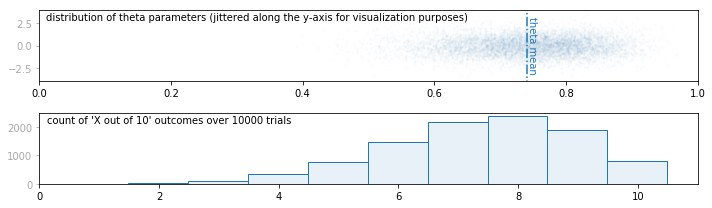

In [68]:
f, axes = plt.subplots(2,1, figsize=(10,3))

from scipy.stats.distributions import norm, bernoulli
bp = stats.beta(17,6)
rvs = bp.rvs(10000)
axes[0].scatter(rvs, norm.rvs(0,1,len(rvs)), s= 4, alpha=.02, marker='1')
axes[0].set_xlim(0,1)
axes[0].set_ylim(-4,4)
axes[0].text(.01,axes[0].get_ylim()[1]*.7,"distribution of theta parameters (jittered along the y-axis for visualization purposes)")
axes[0].plot([rvs.mean(),rvs.mean()],[-5,5],"-.")
axes[0].text(rvs.mean(),2.4,"theta mean", color='#1f77b4', rotation=-90)
from scipy.stats.distributions import binom
outs = []
for i in rvs:
    outs.append(binom.rvs(n=10,p=i,size=1)[0])    
    
axes[1].hist(outs, bins=np.arange(-.01,11,1),align="left",edgecolor='#1f77b4',color="#e8f1f7",linewidth=1)
axes[1].set_xlim(0,11)
axes[1].text(.12,axes[1].get_ylim()[1]*.85,"count of 'X out of 10' outcomes over 10000 trials")
axes[0].tick_params(axis='y', colors='darkgrey')
axes[1].tick_params(axis='y', colors='darkgrey')

plt.tight_layout()
plot_images(plt, '2_6')